In [1]:
import cv2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pandas as pd

import os

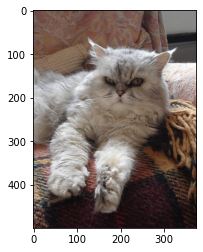

In [2]:
img = cv2.imread("cats/CAT_00/00000001_000.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Check annotations

Here we check the format of the annotations

In [3]:
ann_file = open("cats/CAT_00/00000001_000.jpg.cat", "r")
line = ann_file.read()
points = line.strip().split(" ")
points = list(map(lambda el: int(el), points))
n_points = int(points[0])
points = points[1:]

In [7]:
for x, y in zip(points[::2], points[1::2]):
    # Add point to the image
    img = cv2.circle(img, (x,y), radius=5, color=(255, 0, 0), thickness=-1)

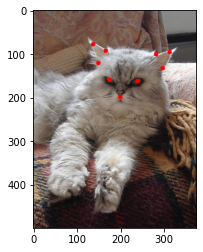

In [8]:
plt.imshow(img)

# Check ear points

Here we check which of points 1-3 for ear corresponds to which point on the image. The points are labeled with following colors: 1-red, 2-green, 3-blue

## Left ear

In [10]:
img = cv2.imread("cats/CAT_00/00000001_000.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for i, (x, y) in enumerate(zip(points[::2][3:6], points[1::2][3:6])):
    # Add point to the image
    img = cv2.circle(img, (x,y), radius=5, color=(255*(i==0), 255*(i==1), 255*(i==2)), thickness=-1)

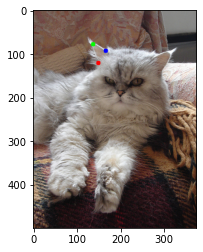

In [11]:
plt.imshow(img)

## Right ear

In [12]:
img = cv2.imread("cats/CAT_00/00000001_000.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for i, (x, y) in enumerate(zip(points[::2][6:], points[1::2][6:])):
    # Add point to the image
    img = cv2.circle(img, (x,y), radius=5, color=(255*(i==0), 255*(i==1), 255*(i==2)), thickness=-1)

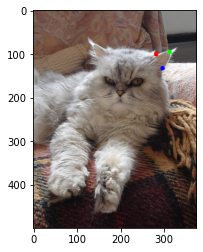

In [13]:
plt.imshow(img)

# Check the number of points

Here we check whether all annotations contain 9 points and if those points are inside the image boundaries

In [2]:
dirs = os.listdir("cats")
dirs

['CAT_00', 'CAT_01', 'CAT_02', 'CAT_03', 'CAT_04', 'CAT_05', 'CAT_06']

In [17]:
img.shape

(500, 375, 3)

In [6]:
less_than_9 = []
out_of_image = []

for dir in dirs:
    for file in tqdm(os.listdir(f"cats/{dir}")):
        if ".cat" in file or ".jpg" not in file:
            continue
        img = cv2.imread(os.path.join("cats", dir, file))
        #print(os.path.join("cats", dir, file))
        h, w, _ = img.shape
        annotations = open(os.path.join("cats", dir, file + ".cat"), "r")
        line = annotations.read()
        points = line.strip().split(" ")
        points = list(map(lambda el: int(el), points))
        if points[0] != 9:
            less_than_9.append("/".join([dir, file]))
        for x, y in zip(points[::2], points[1::2]):
            if x < 0 or x >= w or y < 0 or y >= h:
                out_of_image.append("/".join([dir, file]))
                break

  0%|          | 0/3413 [00:00<?, ?it/s]

  0%|          | 0/3237 [00:00<?, ?it/s]

  0%|          | 0/3515 [00:00<?, ?it/s]

  0%|          | 0/1623 [00:00<?, ?it/s]

  0%|          | 0/2793 [00:00<?, ?it/s]

  0%|          | 0/2643 [00:00<?, ?it/s]

  0%|          | 0/2777 [00:00<?, ?it/s]

In [7]:
print("Number of images with less than 9 points:", len(less_than_9))
print("Number of images with points out of bounds:", len(out_of_image))

Number of images with less than 9 points: 0
Number of images with points out of bounds: 3155


# Check the image size

Check the sizes of the images in the data set (our assuption is that the images in each group are of the same size)

In [14]:
group_sizes = []
different_sizes = []

for dir in dirs:
    file_list = os.listdir(f"cats/{dir}")
    img = cv2.imread(os.path.join("cats", dir, file_list[0].rstrip(".cat")))
    group_size = img.shape[:2]
    group_sizes.append(group_size)
    different_size = 0
    
    for file in tqdm(file_list):
        if ".cat" in file or ".jpg" not in file:
            continue
        img = cv2.imread(os.path.join("cats", dir, file))
        if img.shape[:2] != group_size:
            different_size +=1
    
    different_sizes.append(different_size)

  0%|          | 0/3413 [00:00<?, ?it/s]

  0%|          | 0/3237 [00:00<?, ?it/s]

  0%|          | 0/3515 [00:00<?, ?it/s]

  0%|          | 0/1623 [00:00<?, ?it/s]

  0%|          | 0/2793 [00:00<?, ?it/s]

  0%|          | 0/2643 [00:00<?, ?it/s]

  0%|          | 0/2777 [00:00<?, ?it/s]

In [10]:
for i, ds in enumerate(different_sizes):
    print(f"Number of images with different size in group {i+1}: {ds}")

print("-----------------------------")

for i, gs in enumerate(group_sizes):
    print(f"Size of group {i+1}: {gs}")

Number of images with different size in group 1: 1615
Number of images with different size in group 2: 1568
Number of images with different size in group 3: 1755
Number of images with different size in group 4: 810
Number of images with different size in group 5: 1395
Number of images with different size in group 6: 1320
Number of images with different size in group 7: 1023
-----------------------------
Size of group 1: (500, 375)
Size of group 2: (1024, 768)
Size of group 3: (430, 500)
Size of group 4: (500, 327)
Size of group 5: (350, 480)
Size of group 6: (402, 500)
Size of group 7: (375, 500)


# Check images and annotations after resizing

Here we check if the annotated points are still at right places after resizing. We check 2 images from each split (train, test, val)

In [2]:
data_folder = "Data/"

img_list = ["train/images/CAT_00_00000001_000.jpg", "train/images/CAT_00_00000001_024.jpg",
            "val/images/CAT_00_00000014_003.jpg", "val/images/CAT_00_00000023_020.jpg",
            "test/images/CAT_00_00000002_026.jpg", "test/images/CAT_00_00000035_004.jpg"]

train_annotations = pd.read_csv(data_folder + "train/labels.csv")
val_annotations = pd.read_csv(data_folder + "val/labels.csv")
test_annotations = pd.read_csv(data_folder + "test/labels.csv")

In [11]:
def get_points(image, annotations):
    points = annotations.values[annotations["image"] == image, 1:][0].astype("int")
    
    return points

In [12]:
annot_list = []
for img in img_list[:2]:
    annot_list.append(get_points(img.split("/")[2], train_annotations))
for img in img_list[2:4]:
    annot_list.append(get_points(img.split("/")[2], val_annotations))
for img in img_list[4:]:
    annot_list.append(get_points(img.split("/")[2], test_annotations))

In [13]:
annot_list

[array([105,  72, 143,  73, 119,  89,  89,  54,  82,  35,  99,  42, 168,
         45, 186,  43, 177,  60]),
 array([125,  81, 155,  81, 142, 120, 102,  53,  99,   8, 126,  41, 152,
         40, 178,  11, 173,  51]),
 array([121, 106, 160, 101, 145, 145,  98,  86,  94,  31, 124,  61, 147,
         59, 172,  25, 172,  78]),
 array([ 70,  95, 149,  96, 107, 140,  30,  69,  16,   5,  77,  42, 148,
         43, 211,   7, 193,  72]),
 array([ 69,  96,  92,  94,  82, 121,  52,  84,  49,  48,  67,  68,  89,
         66, 105,  44, 105,  78]),
 array([121, 131, 159, 116, 151, 174,  89, 116,  63,  60, 111,  80, 141,
         69, 162,   3, 179,  83])]

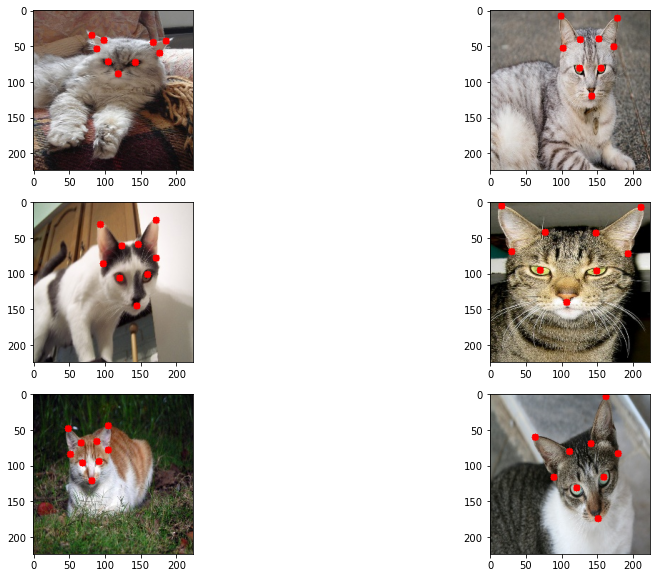

In [15]:
 f, axarr = plt.subplots(3, 2, figsize=(15, 10))
    
for i, (img, points) in enumerate(zip(img_list, annot_list)):
    im = cv2.imread(data_folder + img)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    for x, y in zip(points[::2], points[1::2]):
        im = cv2.circle(im, (x,y), radius=5, color=(255, 0, 0), thickness=-1)
    axarr[i // 2, i % 2].imshow(im)
    
plt.show()